In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import squarify
plt.style.use('seaborn-white')

## Data preparation

In [2]:
df = pd.read_csv('customer_supermarket.csv', sep='\t')
df.drop(columns=['Unnamed: 0'], inplace=True)
df

,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
0,536365,01/12/10 08:26,"2,55",17850.0,United Kingdom,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6
1,536365,01/12/10 08:26,"3,39",17850.0,United Kingdom,71053,WHITE METAL LANTERN,6
2,536365,01/12/10 08:26,"2,75",17850.0,United Kingdom,84406B,CREAM CUPID HEARTS COAT HANGER,8
3,536365,01/12/10 08:26,"3,39",17850.0,United Kingdom,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6
4,536365,01/12/10 08:26,"3,39",17850.0,United Kingdom,84029E,RED WOOLLY HOTTIE WHITE HEART.,6
...,...,...,...,...,...,...,...,...
471905,581587,09/12/11 12:50,"2,1",12680.0,France,22899,CHILDREN'S APRON DOLLY GIRL,6
471906,581587,09/12/11 12:50,"4,15",12680.0,France,23254,CHILDRENS CUTLERY DOLLY GIRL,4
471907,581587,09/12/11 12:50,"4,15",12680.0,France,23255,CHILDRENS CUTLERY CIRCUS PARADE,4
471908,581587,09/12/11 12:50,"4,95",12680.0,France,22138,BAKING SET 9 PIECE RETROSPOT,3


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471910 entries, 0 to 471909
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   BasketID         471910 non-null  object 
 1   BasketDate       471910 non-null  object 
 2   Sale             471910 non-null  object 
 3   CustomerID       406830 non-null  float64
 4   CustomerCountry  471910 non-null  object 
 5   ProdID           471910 non-null  object 
 6   ProdDescr        471157 non-null  object 
 7   Qta              471910 non-null  int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 28.8+ MB


BasketID è una stringa, contiene lettere C che indicano la cancellazione. Eliminiamo le righe corrispondenti. 

In [4]:
import re

def search_letters(the_string):
    if re.search('[a-zA-Z]', the_string) is None:
        return False
    return True

df[df['BasketID'].apply(search_letters)]

,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
141,C536379,01/12/10 09:41,"27,5",14527.0,United Kingdom,D,Discount,-1
154,C536383,01/12/10 09:49,"4,65",15311.0,United Kingdom,35004C,SET OF 3 COLOURED FLYING DUCKS,-1
235,C536391,01/12/10 10:24,"1,65",17548.0,United Kingdom,22556,PLASTERS IN TIN CIRCUS PARADE,-12
236,C536391,01/12/10 10:24,"0,29",17548.0,United Kingdom,21984,PACK OF 12 PINK PAISLEY TISSUES,-24
237,C536391,01/12/10 10:24,"0,29",17548.0,United Kingdom,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24
...,...,...,...,...,...,...,...,...
470979,C581490,09/12/11 09:57,"0,83",14397.0,United Kingdom,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11
471541,C581499,09/12/11 10:28,"224,69",15498.0,United Kingdom,M,Manual,-1
471715,C581568,09/12/11 11:57,"10,95",15311.0,United Kingdom,21258,VICTORIAN SEWING BOX LARGE,-5
471716,C581569,09/12/11 11:58,"1,25",17315.0,United Kingdom,84978,HANGING HEART JAR T-LIGHT HOLDER,-1


In [5]:
def search_letter_C(the_string):
    if re.search('[C]', the_string) is None:
        return False
    return True

df[df['BasketID'].apply(search_letter_C)]

,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
141,C536379,01/12/10 09:41,"27,5",14527.0,United Kingdom,D,Discount,-1
154,C536383,01/12/10 09:49,"4,65",15311.0,United Kingdom,35004C,SET OF 3 COLOURED FLYING DUCKS,-1
235,C536391,01/12/10 10:24,"1,65",17548.0,United Kingdom,22556,PLASTERS IN TIN CIRCUS PARADE,-12
236,C536391,01/12/10 10:24,"0,29",17548.0,United Kingdom,21984,PACK OF 12 PINK PAISLEY TISSUES,-24
237,C536391,01/12/10 10:24,"0,29",17548.0,United Kingdom,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24
...,...,...,...,...,...,...,...,...
470979,C581490,09/12/11 09:57,"0,83",14397.0,United Kingdom,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11
471541,C581499,09/12/11 10:28,"224,69",15498.0,United Kingdom,M,Manual,-1
471715,C581568,09/12/11 11:57,"10,95",15311.0,United Kingdom,21258,VICTORIAN SEWING BOX LARGE,-5
471716,C581569,09/12/11 11:58,"1,25",17315.0,United Kingdom,84978,HANGING HEART JAR T-LIGHT HOLDER,-1


In [6]:
def search_letters_noC(the_string):
    if re.search('[a-zA-Z]', the_string) is None:
        return False
    elif re.search('[C]', the_string) is None:
        return True
    return False

df[df['BasketID'].apply(search_letters_noC)]

,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
256523,A563186,12/08/11 14:51,"-11062,06",NaN,United Kingdom,B,Adjust bad debt,1
256524,A563187,12/08/11 14:52,"-11062,06",NaN,United Kingdom,B,Adjust bad debt,1


In [7]:
tmp = df[df['BasketID'].apply(lambda s: not search_letters(s))]
df = tmp.copy()

Abbiamo eliminato 9086 righe (tutte quelle che hanno la lettera C o A davanti a BasketID).

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 462824 entries, 0 to 471909
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   BasketID         462824 non-null  object 
 1   BasketDate       462824 non-null  object 
 2   Sale             462824 non-null  object 
 3   CustomerID       397925 non-null  float64
 4   CustomerCountry  462824 non-null  object 
 5   ProdID           462824 non-null  object 
 6   ProdDescr        462071 non-null  object 
 7   Qta              462824 non-null  int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 31.8+ MB


Trasformo BasketID in intero.

In [9]:
df['BasketID'] = df['BasketID'].astype(int).copy()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 462824 entries, 0 to 471909
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   BasketID         462824 non-null  int64  
 1   BasketDate       462824 non-null  object 
 2   Sale             462824 non-null  object 
 3   CustomerID       397925 non-null  float64
 4   CustomerCountry  462824 non-null  object 
 5   ProdID           462824 non-null  object 
 6   ProdDescr        462071 non-null  object 
 7   Qta              462824 non-null  int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 31.8+ MB


In [11]:
df[df['Qta'] <= 0]

,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
3738,536764,02/12/10 14:42,0,NaN,United Kingdom,84952C,NaN,-38
6029,536996,03/12/10 15:30,0,NaN,United Kingdom,22712,NaN,-20
6030,537000,03/12/10 15:32,0,NaN,United Kingdom,21414,NaN,-22
6031,537001,03/12/10 15:33,0,NaN,United Kingdom,21653,NaN,-6
6032,537003,03/12/10 15:33,0,NaN,United Kingdom,85126,NaN,-2
...,...,...,...,...,...,...,...,...
467098,581198,07/12/11 18:26,0,NaN,United Kingdom,22025,check,-30
467099,581199,07/12/11 18:26,0,NaN,United Kingdom,84581,NaN,-2
467100,581201,07/12/11 18:30,0,NaN,United Kingdom,22217,damages?,-155
467103,581205,07/12/11 18:32,0,NaN,United Kingdom,20893,damages,-55


In [12]:
df[df['Qta'] < 0]['Sale'].value_counts()

0    668
Name: Sale, dtype: int64

Tutti i record con Qta negativa hanno Sale = 0, allora gli eliminiamo in quanto non sono interessati per l'analisi. Inoltre sono solamente 668 righe.

In [13]:
df = df[df['Qta'] > 0].copy()

In [14]:
df.shape

(462156, 8)

In [15]:
def convert_to_float(s):
    comma_pos = s.find(',')
    if comma_pos >= 0:
        s = s[: comma_pos] + '.' + s[comma_pos+1 :]
    return float(s)

df['Sale'] = df['Sale'].apply(convert_to_float).copy()

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 462156 entries, 0 to 471909
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   BasketID         462156 non-null  int64  
 1   BasketDate       462156 non-null  object 
 2   Sale             462156 non-null  float64
 3   CustomerID       397925 non-null  float64
 4   CustomerCountry  462156 non-null  object 
 5   ProdID           462156 non-null  object 
 6   ProdDescr        461850 non-null  object 
 7   Qta              462156 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 31.7+ MB


In [17]:
df = df[df['Sale'] > 0].copy()
df.shape

(461545, 8)

In [18]:
df[df['ProdID'].apply(str.isalpha)]

,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
45,536370,01/12/10 08:45,18.00,12583.0,France,POST,POSTAGE,3
386,536403,01/12/10 11:27,15.00,12791.0,Netherlands,POST,POSTAGE,1
1122,536527,01/12/10 13:04,18.00,12662.0,Germany,POST,POSTAGE,1
1976,536569,01/12/10 15:35,1.25,16274.0,United Kingdom,M,Manual,1
1987,536569,01/12/10 15:35,18.95,16274.0,United Kingdom,M,Manual,1
...,...,...,...,...,...,...,...,...
471540,581498,09/12/11 10:26,1714.17,NaN,United Kingdom,DOT,DOTCOM POSTAGE,1
471730,581570,09/12/11 11:59,18.00,12662.0,Germany,POST,POSTAGE,1
471767,581574,09/12/11 12:09,18.00,12526.0,Germany,POST,POSTAGE,2
471768,581578,09/12/11 12:16,18.00,12713.0,Germany,POST,POSTAGE,3


1758 record hanno 'ProdID' con solo lettere e non rappresentano veri e propri acquisti.

In [19]:
df[df['ProdID'].apply(str.isalpha)]['ProdID'].value_counts()

POST         1111
DOT           335
M             296
DCGSSBOY        6
DCGSSGIRL       4
PADS            3
AMAZONFEE       1
S               1
m               1
Name: ProdID, dtype: int64

In [20]:
df = df[df['ProdID'].apply(lambda s: not s.isalpha())].copy()

In [21]:
def search_letters(the_string):
    if re.search('[a-z]', the_string) is None:
        return False
    return True

strange_prodID = df['ProdID'].apply(search_letters)
df[df['ProdID'].apply(search_letters)]['ProdID'].value_counts().index.values

array(['47566b', '15056n', '84509a', '72349b', '84997c', '82494l',
       '84997a', '84997b', '84997d', '85123a', '15056bl', '84970s',
       '84970l', '84030e', '85049g', '47591d', '85049a', '84510a',
       '85049e', '72801d', '85039a', '84884a', '85040a', '15056p',
       '85114c', '85014b', '85114b', '84993a', '47559b', '84872a',
       '84559a', '84509c', '84989a', '84559b', '84660c', '84510c',
       '84796a', '72801c', '18098c', '85114a', '85132b', '82001s',
       '85099f', '85014a', '84596f', '72351a', '47590b', 'gift_0001_30',
       '84968e', '84596b', '85132a', '47518f', '35809a', '84596e',
       'gift_0001_10', '84968a', 'gift_0001_40', '85231g', '79066k',
       'gift_0001_20', '72807c', '84795b', 'gift_0001_50', '72807b',
       '84509b', '84536a', '48173c', '85049d', '85231b', '84660b',
       '46776e', '51014c', '72807a', '90184c', '84661b', '84536b',
       '85035b', '84971l', '85036a', '85184c', '82613b', '85034a',
       '84031b', '47570b', '84968d', '84031a', '850

In [22]:
df = df[df['ProdID'].apply(lambda s: s.find('gift_0001_') == -1)].copy()
df

,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
0,536365,01/12/10 08:26,2.55,17850.0,United Kingdom,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6
1,536365,01/12/10 08:26,3.39,17850.0,United Kingdom,71053,WHITE METAL LANTERN,6
2,536365,01/12/10 08:26,2.75,17850.0,United Kingdom,84406B,CREAM CUPID HEARTS COAT HANGER,8
3,536365,01/12/10 08:26,3.39,17850.0,United Kingdom,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6
4,536365,01/12/10 08:26,3.39,17850.0,United Kingdom,84029E,RED WOOLLY HOTTIE WHITE HEART.,6
...,...,...,...,...,...,...,...,...
471904,581587,09/12/11 12:50,0.85,12680.0,France,22613,PACK OF 20 SPACEBOY NAPKINS,12
471905,581587,09/12/11 12:50,2.10,12680.0,France,22899,CHILDREN'S APRON DOLLY GIRL,6
471906,581587,09/12/11 12:50,4.15,12680.0,France,23254,CHILDRENS CUTLERY DOLLY GIRL,4
471907,581587,09/12/11 12:50,4.15,12680.0,France,23255,CHILDRENS CUTLERY CIRCUS PARADE,4


In [23]:
df['ProdDescr'].value_counts()

WHITE HANGING HEART T-LIGHT HOLDER    2169
JUMBO BAG RED RETROSPOT               1871
REGENCY CAKESTAND 3 TIER              1859
PARTY BUNTING                         1548
ASSORTED COLOUR BIRD ORNAMENT         1459
                                      ... 
GREEN CRYSTAL DROP EARRINGS              1
WRAP  PINK FLOCK                         1
SET 10 MINI SANTA & SNOWMAN  17087       1
ORANGE FLOWER MUG                        1
WHITE SILVER NECKLACE SHELL GLASS        1
Name: ProdDescr, Length: 3977, dtype: int64

In [24]:
df[df['ProdID'] == 'C2']

,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
1422,536540,01/12/10 14:05,50.0,14911.0,EIRE,C2,CARRIAGE,1
10319,537368,06/12/10 12:40,50.0,14911.0,EIRE,C2,CARRIAGE,1
10652,537378,06/12/10 13:06,50.0,14911.0,EIRE,C2,CARRIAGE,1
16525,537963,09/12/10 11:30,50.0,13369.0,United Kingdom,C2,CARRIAGE,1
16564,538002,09/12/10 11:48,50.0,14932.0,Channel Islands,C2,CARRIAGE,1
...,...,...,...,...,...,...,...,...
447963,579539,30/11/11 10:06,50.0,14911.0,EIRE,C2,CARRIAGE,1
449563,579768,30/11/11 15:08,50.0,14911.0,EIRE,C2,CARRIAGE,1
450596,579910,01/12/11 08:52,50.0,14911.0,EIRE,C2,CARRIAGE,1
452666,580127,01/12/11 17:51,50.0,14911.0,EIRE,C2,CARRIAGE,1


In [25]:
df = df[df['ProdID'] != 'C2'].copy()
df.shape

(459633, 8)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 459633 entries, 0 to 471908
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   BasketID         459633 non-null  int64  
 1   BasketDate       459633 non-null  object 
 2   Sale             459633 non-null  float64
 3   CustomerID       396349 non-null  float64
 4   CustomerCountry  459633 non-null  object 
 5   ProdID           459633 non-null  object 
 6   ProdDescr        459633 non-null  object 
 7   Qta              459633 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 31.6+ MB


In [27]:
from dateutil.parser import parse

def is_date(string, fuzzy=False):
    """
    Return whether the string can be interpreted as a date.

    :param string: str, string to check for date
    :param fuzzy: bool, ignore unknown tokens in string if True
    """
    try: 
        parse(string, fuzzy=fuzzy)
        return True

    except ValueError:
        return False


is_date_output = df['BasketDate'].apply(is_date)
is_date_output

0         True
1         True
2         True
3         True
4         True
          ... 
471904    True
471905    True
471906    True
471907    True
471908    True
Name: BasketDate, Length: 459633, dtype: bool

In [28]:
is_date_output.value_counts()

True    459633
Name: BasketDate, dtype: int64

All dates are well formatted.

In [29]:
import datetime

def validate(date_text):
    try:
        datetime.datetime.strptime(date_text, '%d/%m/%y %H:%M')
        return True
    except ValueError:
        return False

    
correct_date_format = df['BasketDate'].apply(validate)
correct_date_format.value_counts()

True    459633
Name: BasketDate, dtype: int64

All dates are in the same format.

In [30]:
df['BasketDate'] = pd.to_datetime(df['BasketDate'], format="%d/%m/%y %H:%M").copy()

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 459633 entries, 0 to 471908
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   BasketID         459633 non-null  int64         
 1   BasketDate       459633 non-null  datetime64[ns]
 2   Sale             459633 non-null  float64       
 3   CustomerID       396349 non-null  float64       
 4   CustomerCountry  459633 non-null  object        
 5   ProdID           459633 non-null  object        
 6   ProdDescr        459633 non-null  object        
 7   Qta              459633 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 31.6+ MB


In [32]:
df[df['CustomerCountry'] == 'Unspecified']

,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
128523,549687,2011-04-11 13:29:00,7.95,12363.0,Unspecified,20685,DOORMAT RED RETROSPOT,2
128524,549687,2011-04-11 13:29:00,7.95,12363.0,Unspecified,22691,DOORMAT WELCOME SUNRISE,2
128525,549687,2011-04-11 13:29:00,7.95,12363.0,Unspecified,48116,DOORMAT MULTICOLOUR STRIPE,2
128526,549687,2011-04-11 13:29:00,0.55,12363.0,Unspecified,21213,PACK OF 72 SKULL CAKE CASES,24
128527,549687,2011-04-11 13:29:00,0.55,12363.0,Unspecified,21977,PACK OF 60 PINK PAISLEY CAKE CASES,24
...,...,...,...,...,...,...,...,...
435421,578539,2011-11-24 14:55:00,4.95,NaN,Unspecified,23569,TRADTIONAL ALPHABET STAMP SET,4
435422,578539,2011-11-24 14:55:00,0.42,NaN,Unspecified,23507,MINI PLAYING CARDS BUFFALO BILL,20
435423,578539,2011-11-24 14:55:00,1.25,NaN,Unspecified,23570,TRADITIONAL PICK UP STICKS GAME,12
435424,578539,2011-11-24 14:55:00,1.65,NaN,Unspecified,23571,TRADITIONAL NAUGHTS & CROSSES,12


In [33]:
null = df[df['CustomerID'].isnull()]['BasketID'].value_counts()
null

573585    534
580729    357
581219    351
581492    351
558475    330
         ... 
570286      1
566761      1
541118      1
551847      1
557610      1
Name: BasketID, Length: 1253, dtype: int64

In [34]:
non_null = df.dropna()['BasketID'].value_counts()
non_null

576339    541
579196    532
580727    528
578270    441
573576    434
         ... 
545448      1
571237      1
577848      1
572085      1
556249      1
Name: BasketID, Length: 18413, dtype: int64

In [35]:
null.index.values

array([573585, 580729, 581219, ..., 541118, 551847, 557610])

In [36]:
non_null.index.values

array([576339, 579196, 580727, ..., 577848, 572085, 556249])

In [37]:
def intersection(lst1, lst2): 
    return list(set(lst1) & set(lst2))

intersection(list(null.index.values), list(non_null.index.values))

[]

Non si possono recuperare i CustomerID dai BasketID.

In [38]:
df['CustomerID'].value_counts()

17841.0    7838
14911.0    5589
14096.0    5095
12748.0    4580
14606.0    2698
           ... 
13302.0       1
16738.0       1
13106.0       1
16257.0       1
14424.0       1
Name: CustomerID, Length: 4335, dtype: int64

In [39]:
df[df['CustomerID'].isnull()]['CustomerCountry'].value_counts()

United Kingdom    62634
EIRE                297
Hong Kong           134
Unspecified          96
Switzerland          55
France               33
Israel               19
Portugal             15
Bahrain               1
Name: CustomerCountry, dtype: int64

In [40]:
df.duplicated().value_counts()

False    454440
True       5193
dtype: int64

Eliminiamo le righe duplicate.

In [41]:
df.drop_duplicates(inplace=True)

In [42]:
df.duplicated().value_counts()

False    454440
dtype: int64

In [43]:
df[df['CustomerCountry'] == 'Unspecified']

,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
128523,549687,2011-04-11 13:29:00,7.95,12363.0,Unspecified,20685,DOORMAT RED RETROSPOT,2
128524,549687,2011-04-11 13:29:00,7.95,12363.0,Unspecified,22691,DOORMAT WELCOME SUNRISE,2
128525,549687,2011-04-11 13:29:00,7.95,12363.0,Unspecified,48116,DOORMAT MULTICOLOUR STRIPE,2
128526,549687,2011-04-11 13:29:00,0.55,12363.0,Unspecified,21213,PACK OF 72 SKULL CAKE CASES,24
128527,549687,2011-04-11 13:29:00,0.55,12363.0,Unspecified,21977,PACK OF 60 PINK PAISLEY CAKE CASES,24
...,...,...,...,...,...,...,...,...
435421,578539,2011-11-24 14:55:00,4.95,NaN,Unspecified,23569,TRADTIONAL ALPHABET STAMP SET,4
435422,578539,2011-11-24 14:55:00,0.42,NaN,Unspecified,23507,MINI PLAYING CARDS BUFFALO BILL,20
435423,578539,2011-11-24 14:55:00,1.25,NaN,Unspecified,23570,TRADITIONAL PICK UP STICKS GAME,12
435424,578539,2011-11-24 14:55:00,1.65,NaN,Unspecified,23571,TRADITIONAL NAUGHTS & CROSSES,12


In [44]:
df.loc[df['CustomerCountry'] == 'Unspecified','CustomerCountry'] = np.nan

In [45]:
null_country = df[df['CustomerCountry'].isnull()]['CustomerID'].value_counts()
non_null_country = df.dropna()['CustomerID'].value_counts()

intersection(list(null_country.index.values), list(non_null_country.index.values))

[]

In [46]:
null_country = df[df['CustomerCountry'].isnull()]['BasketID'].value_counts()
non_null_country = df.dropna()['BasketID'].value_counts()

intersection(list(null_country.index.values), list(non_null_country.index.values))

[]

In [47]:
df.dropna(inplace=True, subset=['CustomerCountry'])

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 454103 entries, 0 to 471908
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   BasketID         454103 non-null  int64         
 1   BasketDate       454103 non-null  datetime64[ns]
 2   Sale             454103 non-null  float64       
 3   CustomerID       390921 non-null  float64       
 4   CustomerCountry  454103 non-null  object        
 5   ProdID           454103 non-null  object        
 6   ProdDescr        454103 non-null  object        
 7   Qta              454103 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 31.2+ MB


Data che solo 337 righe hanno country Unspecified possiamo eliminare queste righe.

## Data exploration

### Prodotti più comprati

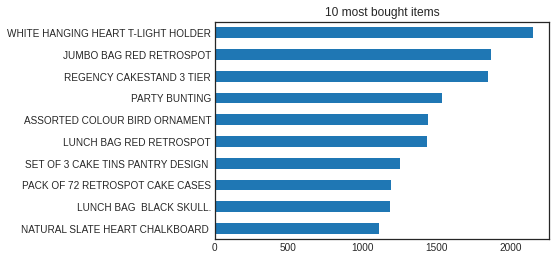

In [49]:
df['ProdDescr'].value_counts(ascending=True).tail(10).plot(kind='barh', title='10 most bought items')


In [50]:
df['ProdDescr'].value_counts().head(10)

WHITE HANGING HEART T-LIGHT HOLDER    2157
JUMBO BAG RED RETROSPOT               1868
REGENCY CAKESTAND 3 TIER              1847
PARTY BUNTING                         1541
ASSORTED COLOUR BIRD ORNAMENT         1443
LUNCH BAG RED RETROSPOT               1436
SET OF 3 CAKE TINS PANTRY DESIGN      1252
PACK OF 72 RETROSPOT CAKE CASES       1193
LUNCH BAG  BLACK SKULL.               1187
NATURAL SLATE HEART CHALKBOARD        1111
Name: ProdDescr, dtype: int64

### Periodi in cui si fanno più acquisti

In [51]:
df['BasketDate'].min()

Timestamp('2010-12-01 08:26:00')

In [52]:
df['BasketDate'].max()

Timestamp('2011-12-09 12:50:00')

The purchases in the dataset range from december 2010 to 9th december 2011.


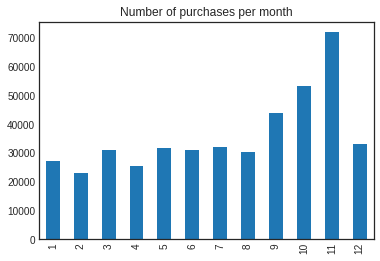

In [53]:
df_no_dec_11 = df[df['BasketDate'] < '2011/12/01']
df_no_dec_11['BasketDate'].dt.month.value_counts(sort=False).plot(kind='bar', title='Number of purchases per month')

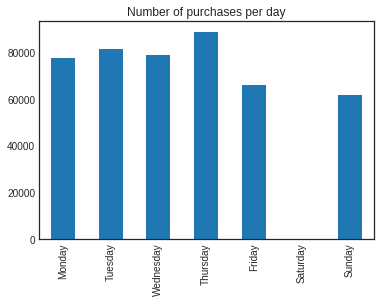

In [54]:
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['BasketDate'].dt.day_name().value_counts().reindex(cats).plot(kind='bar', title='Number of purchases per day')

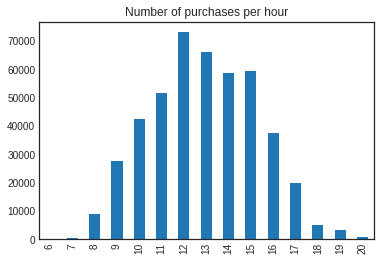

In [55]:
df['BasketDate'].dt.hour.value_counts(sort=False).plot(kind='bar', title='Number of purchases per hour')

In [56]:
df['CustomerCountry'].value_counts()

United Kingdom          411514
Germany                   8643
France                    8052
EIRE                      7423
Spain                     2417
Netherlands               2322
Belgium                   1935
Switzerland               1864
Portugal                  1431
Australia                 1180
Norway                    1048
Channel Islands            743
Italy                      741
Finland                    647
Cyprus                     601
Sweden                     427
Austria                    384
Denmark                    367
Poland                     325
Japan                      321
Israel                     264
Singapore                  215
Iceland                    182
USA                        179
Canada                     150
Greece                     142
Hong Kong                  133
Malta                      109
United Arab Emirates        67
European Community          57
RSA                         57
Lebanon                     45
Lithuani

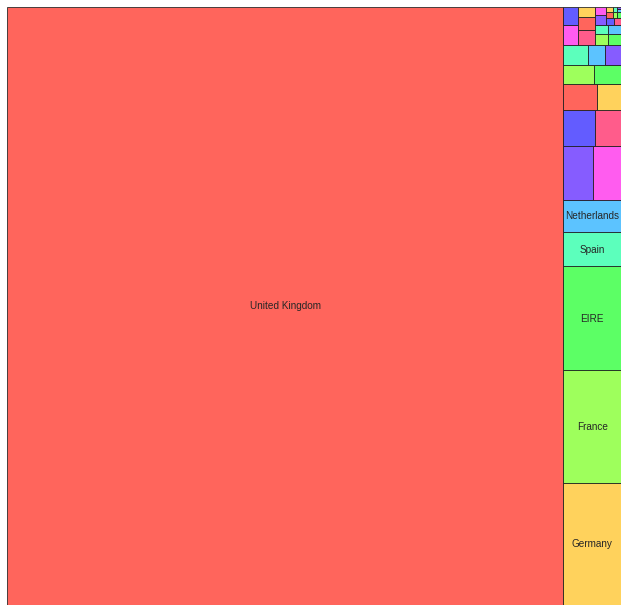

In [57]:
color=['#FF3F33','#FFC733','#86FF33','#33FF3F', '#33FFAC', '#33B5FF', '#6833FF', '#FF33EC', '#3C33FF', '#FF336E']
#color=['red','blue','green','grey']
#color=['red','#1C9FB0','#32A0CE','#1C51B0']
fig, ax = plt.subplots(1, figsize = (11,11))
squarify.plot(sizes=df['CustomerCountry'].value_counts(), 
              label=df['CustomerCountry'].value_counts().index[:6], 
              alpha=0.8, color=color, bar_kwargs=dict(linewidth=1, edgecolor="#222222"))

plt.axis('off')
plt.show()

In [58]:
df_by_basketID_mean = df.groupby('BasketID').mean()
df_by_basketID_mean

,Sale,CustomerID,Qta
BasketID,,,
536365,3.910000,17850.0,5.714286
536366,1.850000,17850.0,6.000000
536367,4.853333,13047.0,6.916667
536368,4.775000,13047.0,3.750000
536369,5.950000,13047.0,3.000000
...,...,...,...
581583,1.650000,13777.0,38.000000
581584,1.285000,13777.0,60.000000
581585,1.799048,15804.0,13.238095


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f01845e1940>]],
      dtype=object)

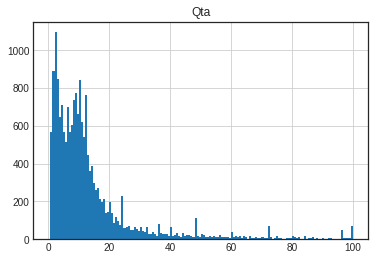

In [59]:
df_by_basketID_mean.hist(column='Qta', bins=150, range=[0,100])

Il grafico sopra rappresenta il numero medio di prodotti uguali acquistati per ogni carrello (basket).

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f01843c65e0>]],
      dtype=object)

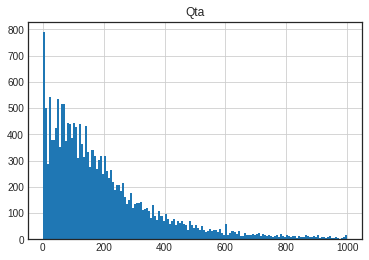

In [60]:
df_by_basketID_sum = df.groupby('BasketID').sum()
df_by_basketID_sum.hist(column='Qta', bins=150, range=[0,1000])

Il grafico sopra rappresenta il quantità totale di prodotti per carrello.

In [61]:
df['TotSale'] = df['Sale'] * df['Qta']
df

,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta,TotSale
0,536365,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,15.30
1,536365,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,71053,WHITE METAL LANTERN,6,20.34
2,536365,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,84406B,CREAM CUPID HEARTS COAT HANGER,8,22.00
3,536365,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,20.34
4,536365,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,20.34
...,...,...,...,...,...,...,...,...,...
471904,581587,2011-12-09 12:50:00,0.85,12680.0,France,22613,PACK OF 20 SPACEBOY NAPKINS,12,10.20
471905,581587,2011-12-09 12:50:00,2.10,12680.0,France,22899,CHILDREN'S APRON DOLLY GIRL,6,12.60
471906,581587,2011-12-09 12:50:00,4.15,12680.0,France,23254,CHILDRENS CUTLERY DOLLY GIRL,4,16.60
471907,581587,2011-12-09 12:50:00,4.15,12680.0,France,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,16.60


In [62]:
df_by_basketID_mean = df.groupby('BasketID').mean()
df_by_basketID_mean

,Sale,CustomerID,Qta,TotSale
BasketID,,,,
536365,3.910000,17850.0,5.714286,19.874286
536366,1.850000,17850.0,6.000000,11.100000
536367,4.853333,13047.0,6.916667,23.227500
536368,4.775000,13047.0,3.750000,17.512500
536369,5.950000,13047.0,3.000000,17.850000
...,...,...,...,...
581583,1.650000,13777.0,38.000000,62.300000
581584,1.285000,13777.0,60.000000,70.320000
581585,1.799048,15804.0,13.238095,15.669048


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f01843c63a0>]],
      dtype=object)

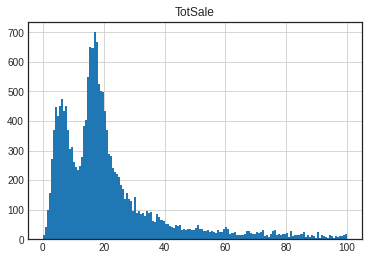

In [63]:
df_by_basketID_mean.hist(column='TotSale', bins=150, range=[0,100])

Il grafico sopra rappresenta la spesa media per prodotto acquistato, per carrello.

In [64]:
df_by_basketID_sum = df.groupby('BasketID').sum()
df_by_basketID_sum

,Sale,CustomerID,Qta,TotSale
BasketID,,,,
536365,27.37,124950.0,40,139.12
536366,3.70,35700.0,12,22.20
536367,58.24,156564.0,83,278.73
536368,19.10,52188.0,15,70.05
536369,5.95,13047.0,3,17.85
...,...,...,...,...
581583,3.30,27554.0,76,124.60
581584,2.57,27554.0,120,140.64
581585,37.78,331884.0,278,329.05


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0181f5ef10>]],
      dtype=object)

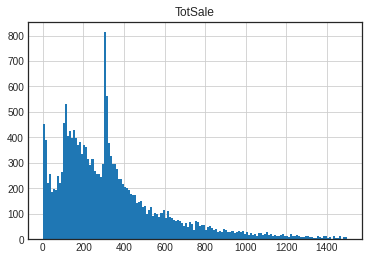

In [65]:
df_by_basketID_sum.hist(column='TotSale', bins=150, range=[0,1500])

Il grafico sopra rappresenta la spesa totale per carrello.

### Pairwise correlation

In [66]:
df

,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta,TotSale
0,536365,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,15.30
1,536365,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,71053,WHITE METAL LANTERN,6,20.34
2,536365,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,84406B,CREAM CUPID HEARTS COAT HANGER,8,22.00
3,536365,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,20.34
4,536365,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,20.34
...,...,...,...,...,...,...,...,...,...
471904,581587,2011-12-09 12:50:00,0.85,12680.0,France,22613,PACK OF 20 SPACEBOY NAPKINS,12,10.20
471905,581587,2011-12-09 12:50:00,2.10,12680.0,France,22899,CHILDREN'S APRON DOLLY GIRL,6,12.60
471906,581587,2011-12-09 12:50:00,4.15,12680.0,France,23254,CHILDRENS CUTLERY DOLLY GIRL,4,16.60
471907,581587,2011-12-09 12:50:00,4.15,12680.0,France,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,16.60


In [67]:
df[['Sale', 'Qta']].corr()

,Sale,Qta
Sale,1.000000,-0.021333
Qta,-0.021333,1.000000


In [74]:
df['CustomerID'].value_counts().index.max()

18287.0

In [75]:
df['CustomerID'].value_counts().index.min()

12346.0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0180ebdbe0>]],
      dtype=object)

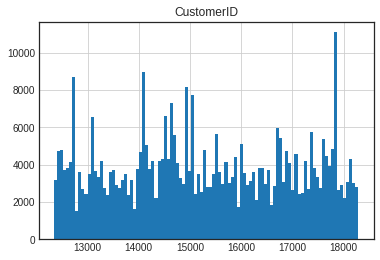

In [78]:
df.hist(column='CustomerID', bins=100)

In [80]:
df.dropna().to_csv('customer_supermarket_prepared.csv')